# COURSE: Master Python for scientific programming by solving projects
## PROJECT: Entropy of written English
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/maspy_x/?couponCode=202010

In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
import string

# Import text from website

In [2]:
# get raw text from internet
book = requests.get('https://www.gutenberg.org/files/35/35-0.txt')


In [3]:
# extract just the text and have a look at it
text = book.text

In [4]:
# let's see the beginning of it

text[:2000]

'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: The Time Machine\r\n\r\nAuthor: H. G. Wells\r\n\r\nRelease Date: July, 1992 [eBook #35]\r\n[Most recently updated: October 22, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***\r\n\r\n\r\n\r\n\r\nThe Time Machine\r\n\r\nAn Invention\r\n\r\nby H. G. Wells\r\n\r\n\r\nCONTENTS\r\n\r\n I Introduction\r\n II The Machine\r\n III The Time Traveller Returns\r\n IV 

In [5]:
# character strings to replace with space
strings2replace = [
                 '\r\n\r\nâ\x80\x9c', # new paragraph
                 'â\x80\x9c',         # open quote
                 'â\x80\x9d',         # close quote
                 '\r\n',              # new line
                 'â\x80\x94',         # hyphen
                 'â\x80\x99',         # single apostrophe
                 'â\x80\x98',         # single quote
                 '_',                 # underscore, used for stressing
                 ]


In [6]:
# use regular expression (re) to replace those strings with space
for i in range(len(strings2replace)):
    text = re.sub(strings2replace[i], ' ', text)

# remove a few weird characters at start    
text = text[3:]

# let's have a look and the fixed text!
text[:100000]

'The Project Gutenberg eBook of The Time Machine, by H. G. Wells  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: The Time Machine  Author: H. G. Wells  Release Date: July, 1992 [eBook #35] [Most recently updated: October 22, 2020]  Language: English  Character set encoding: UTF-8   *** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***     The Time Machine  An Invention  by H. G. Wells   CONTENTS   I Introduction  II The Machine  III The Time Traveller Returns  IV Time Travelling  V In the Golden Age  VI The Sunset of Mankind  VII A Sudden Shock  VIII Explanation  IX The Morlocks  X

# Distribution of word lengths

In [7]:
# convert to words
words = text.split()

words[:30]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'The',
 'Time',
 'Machine,',
 'by',
 'H.',
 'G.',
 'Wells',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'United',
 'States',
 'and',
 'most',
 'other',
 'parts',
 'of']

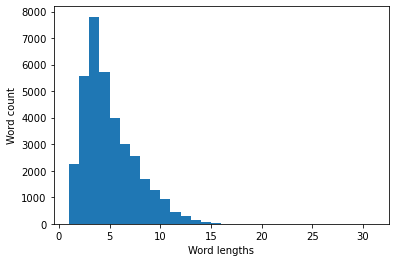

In [8]:
# get the lengths of each word
wordlengths = np.zeros(len(words))

for wordi in range(len(words)):
    wordlengths[wordi] = len(words[wordi])

# show the histogram
plt.hist(wordlengths,bins=30)
plt.xlabel('Word lengths')
plt.ylabel('Word count')
plt.show()

In [9]:
# alt method
wordcounts = np.zeros(40)

for wrd in words:
    wordcounts[len(wrd)] += 1
    
wordcounts

array([0.000e+00, 2.266e+03, 5.570e+03, 7.804e+03, 5.729e+03, 3.981e+03,
       2.996e+03, 2.551e+03, 1.700e+03, 1.277e+03, 9.290e+02, 4.490e+02,
       2.940e+02, 1.560e+02, 5.700e+01, 2.600e+01, 8.000e+00, 5.000e+00,
       4.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])

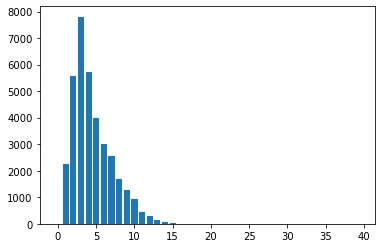

In [10]:
plt.bar(range(len(wordcounts)), wordcounts)
plt.show()

# Letter frequencies

In [11]:
letters = [char.lower() for word in words for char in word if char.isalpha()]

In [12]:
text_alpha = " ".join(re.findall("[a-zA-Z]+", text))

In [13]:
letters = [char.lower() for word in words for char in word if char.isalpha()]

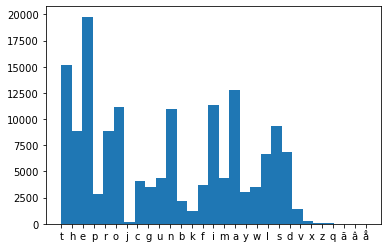

In [14]:
plt.hist(letters, bins=len(np.unique(letters)))
plt.show()

In [15]:
# alt
letters = string.ascii_lowercase
letters

'abcdefghijklmnopqrstuvwxyz'

In [16]:
text.count('a')

12432

In [17]:
text.lower().count('a')

12752

In [18]:
# now repeat for letter frequencies: count the frequency of all letters
numLetters = len(letters)

lettercounts = np.zeros(numLetters)

n = 0
for i in letters:
    lettercounts[n] = text.lower().count(i)
    n+=1

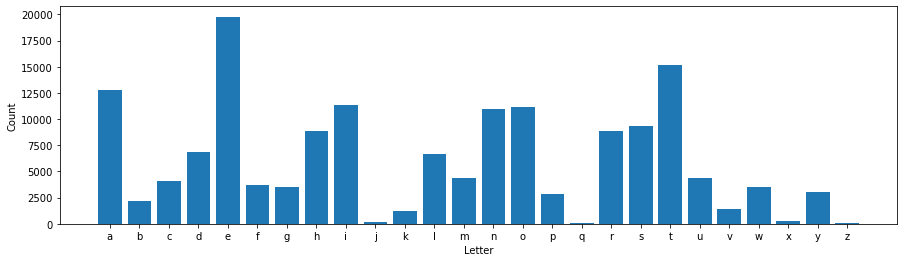

In [19]:


# show in a bar plot
fig,ax = plt.subplots(1,figsize=(15,4))
ax.bar(range(numLetters),lettercounts)
ax.set_xticks(range(numLetters))
ax.set_xticklabels(letters)
ax.set_xlabel('Letter')
ax.set_ylabel('Count')
plt.show()

# Letter entropy

0.9999999999999997


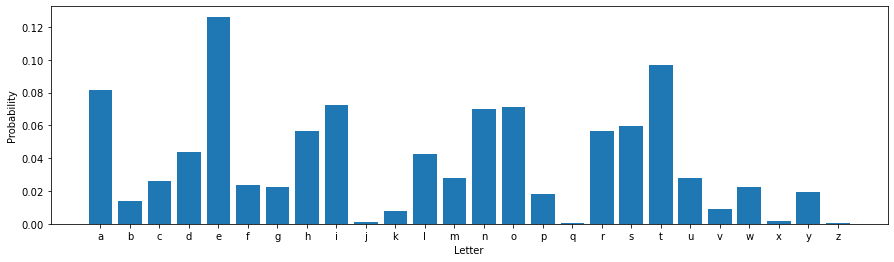

In [20]:
# compute entropy of letters

# convert frequency to probability
letterprob = lettercounts/np.sum(lettercounts)

# confirm: probabilities must sum to 1
print(sum(letterprob))

# use the same bar plot as above
fig,ax = plt.subplots(1,figsize=(15,4))
ax.bar(range(numLetters),letterprob)
ax.set_xticks(range(numLetters))
ax.set_xticklabels(letters)
ax.set_xlabel('Letter')
ax.set_ylabel('Probability')
fig;

In [21]:
np.log2(0)

<ipython-input-21-94b78e711a59>:1: RuntimeWarning: divide by zero encountered in log2
  np.log2(0)


-inf

In [22]:
np.log2(0 + np.finfo(float).eps)

-52.0

In [23]:
x=.9
x * np.log2(x)

-0.13680278410054494

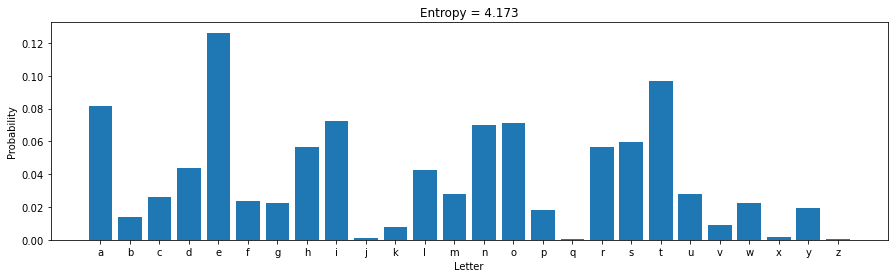

In [24]:
# compute overall entropy and re-plot

entropy = -np.sum(letterprob * np.log2(letterprob + np.finfo(float).eps))

# add this: np.finfo(float).eps just so we are not taking a log of zero...

# re-draw the plot and add a title with the entropy
ax.set_title('Entropy = %.3f'%entropy)
fig

In [25]:
# check your answer against the link below
# https://cs.stanford.edu/people/eroberts/courses/soco/projects/1999-00/information-theory/entropy_of_english_9.html

# Conditional (sequence) entropy

In [26]:
# Just look at lowercase letters
alpha_text = "".join(filter(str.isalpha, text)).lower()

In [27]:
# now for conditional entropy
# initialize matrix
probmat = np.zeros((numLetters,numLetters))

# loop through letters and populate the probmat matrix with sequence counts
for i in range(len(alpha_text)-1):
  # consider only if this and following letter are actual letters (ignore punctuation)
    try:
        probmat[ord(alpha_text[i]) - 97, ord(alpha_text[i+1]) - 97] +=1
    except:
        continue

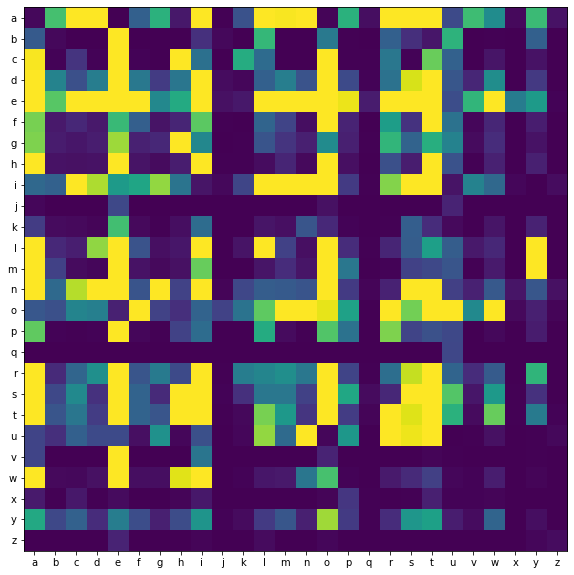

In [28]:
# show the matrix!

# make sure it has correct x- and y-axis ticks and labels
nums = np.linspace(0,25, num=26)
letters = [chr(int(num+97)) for num in nums ]

fig,ax = plt.subplots(1,figsize=(10,10))

ax.imshow(probmat,vmax=500)
plt.xticks(ticks=nums, labels=letters)
plt.yticks(ticks=nums, labels=letters)
plt.show()

In [29]:
probmat[0]

array([1.100e+01, 3.520e+02, 7.100e+02, 6.900e+02, 1.000e+00, 1.530e+02,
       3.220e+02, 3.300e+01, 5.130e+02, 2.000e+00, 1.250e+02, 9.910e+02,
       4.960e+02, 2.530e+03, 7.000e+00, 3.200e+02, 1.800e+01, 1.165e+03,
       1.432e+03, 1.803e+03, 1.120e+02, 3.440e+02, 2.430e+02, 1.300e+01,
       3.400e+02, 2.500e+01])

In [30]:
numletters

NameError: name 'numletters' is not defined

In [ ]:
probs

In [ ]:
-np.sum(probs * np.log2(probs + np.finfo(float).eps))

In [ ]:
condentr = np.zeros(probmat.shape[0])

for i in range(probmat.shape[0]):
    probs = probmat[i,:] / sum(probmat[i,:])
    condentr[i] = -np.sum(probs * np.log2(probs + np.finfo(float).eps))

In [ ]:
condentr

In [ ]:
# now compute conditional entropy
# create prob vector of each for


fig,ax = plt.subplots(1,figsize=(12,4))
ax.bar(range(len(condentr)),condentr)
ax.set_xticks(range(len(condentr)))
ax.set_xticklabels(letters)
ax.set_ylabel('Entropy (bits)')
ax.set_title('Lag-1 conditional entropy per letter')
plt.show()

# Bonus: Make a word cloud

In [36]:
# bonus: word cloud
from wordcloud import WordCloud

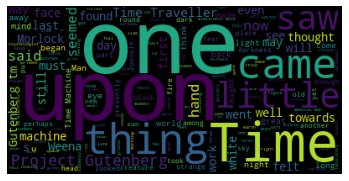

In [38]:
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()